In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import random
import numpy as np
from matplotlib.patches import Polygon

In [2]:
df_baseline = pd.read_csv('CMA_baseline_track.csv')
df_model = pd.read_csv('CMA_track.csv')

In [3]:
df_baseline

TID      KEY        TIME   LAT   LONG   PRED_LAT   PRED_LONG
0      1827  2000-01  2000050700  13.2  131.6  12.761710  130.267619
1      1827  2000-01  2000050706  13.4  131.3  14.246103  129.397558
2      1827  2000-01  2000050712  13.7  131.2  15.438673  131.146906
3      1827  2000-01  2000050718  13.8  131.3  15.276950  130.851743
4      1827  2000-01  2000050800  14.0  131.5  14.539988  130.651136
...     ...      ...         ...   ...    ...        ...         ...
11148  2355  2018-33  2018122900  11.5  124.4  10.867904  126.551614
11149  2355  2018-33  2018122906  11.5  123.2  11.356955  126.312686
11150  2355  2018-33  2018122912  10.8  122.1  11.505380  121.698026
11151  2355  2018-33  2018122918  10.0  121.0  12.837285  120.345603
11152  2355  2018-33  2018123000   8.8  119.9  11.550210  119.859615

[11153 rows x 7 columns]

In [4]:
tids = df_baseline['TID'].unique()

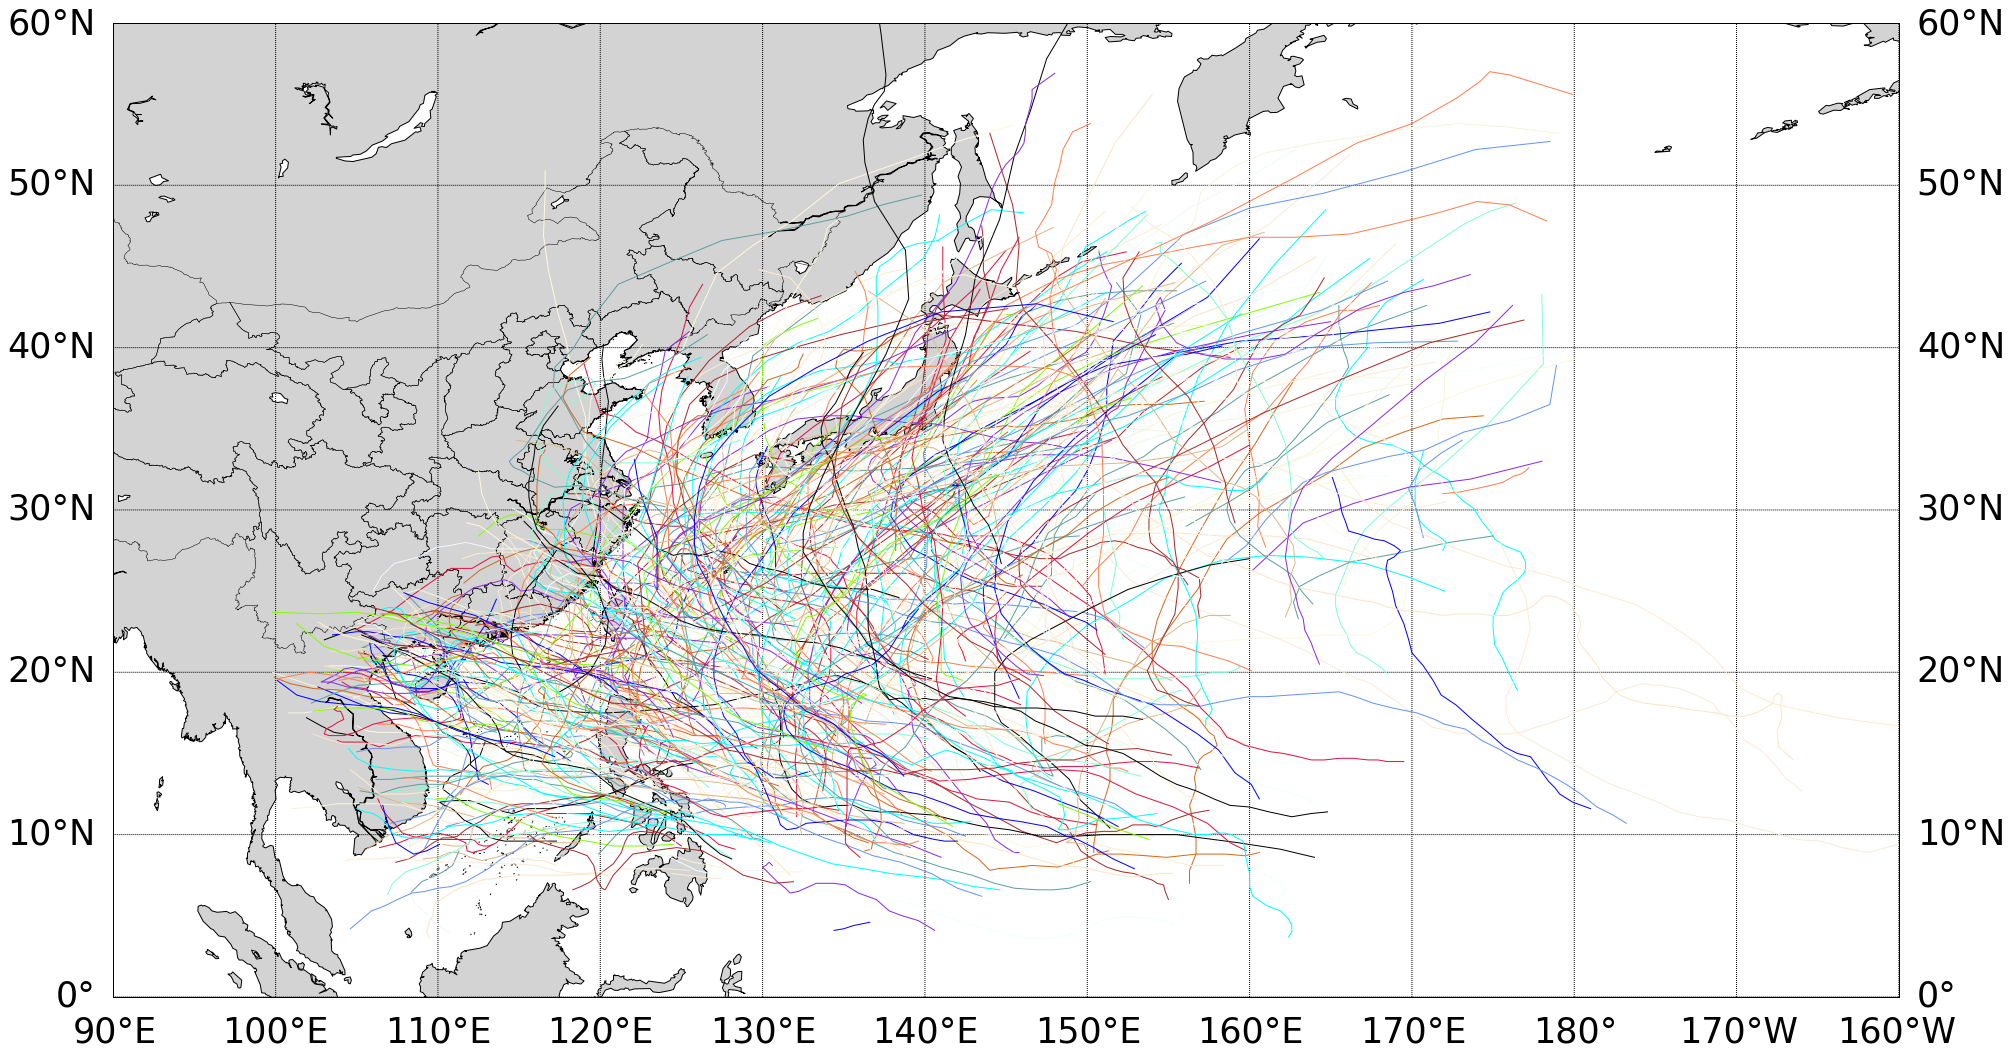

In [5]:
fig = plt.figure(figsize=(32,40))
map = Basemap(resolution='l',
              llcrnrlon=90, 
              llcrnrlat=0, 
              urcrnrlon=200, 
              urcrnrlat=60)

# draw
map.drawcoastlines()

CHN = "../shapefiles_china/china" # address of shape file
map.readshapefile(CHN,'states',drawbounds=True)

map.drawmapboundary(fill_color='white')
map.fillcontinents(color='#D3D3D3')
map.drawparallels(np.arange(0,90,10),labels=[1,1,0,1],fontsize=35)
map.drawmeridians(np.arange(0,360,10),labels=[1,1,0,1],fontsize=35)

color = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan']
# a basic map of guangdong 
for tid in tids:
    color_index = random.randint(0,len(color)-1)
    map.plot(df_baseline[df_baseline['TID']==tid]['LONG'], df_baseline[df_baseline['TID']==tid]['LAT'], color=color[color_index],linewidth=1)
plt.savefig('total.pdf')
plt.show()

In [6]:
colors.cnames.keys()

dict_keys(['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lights

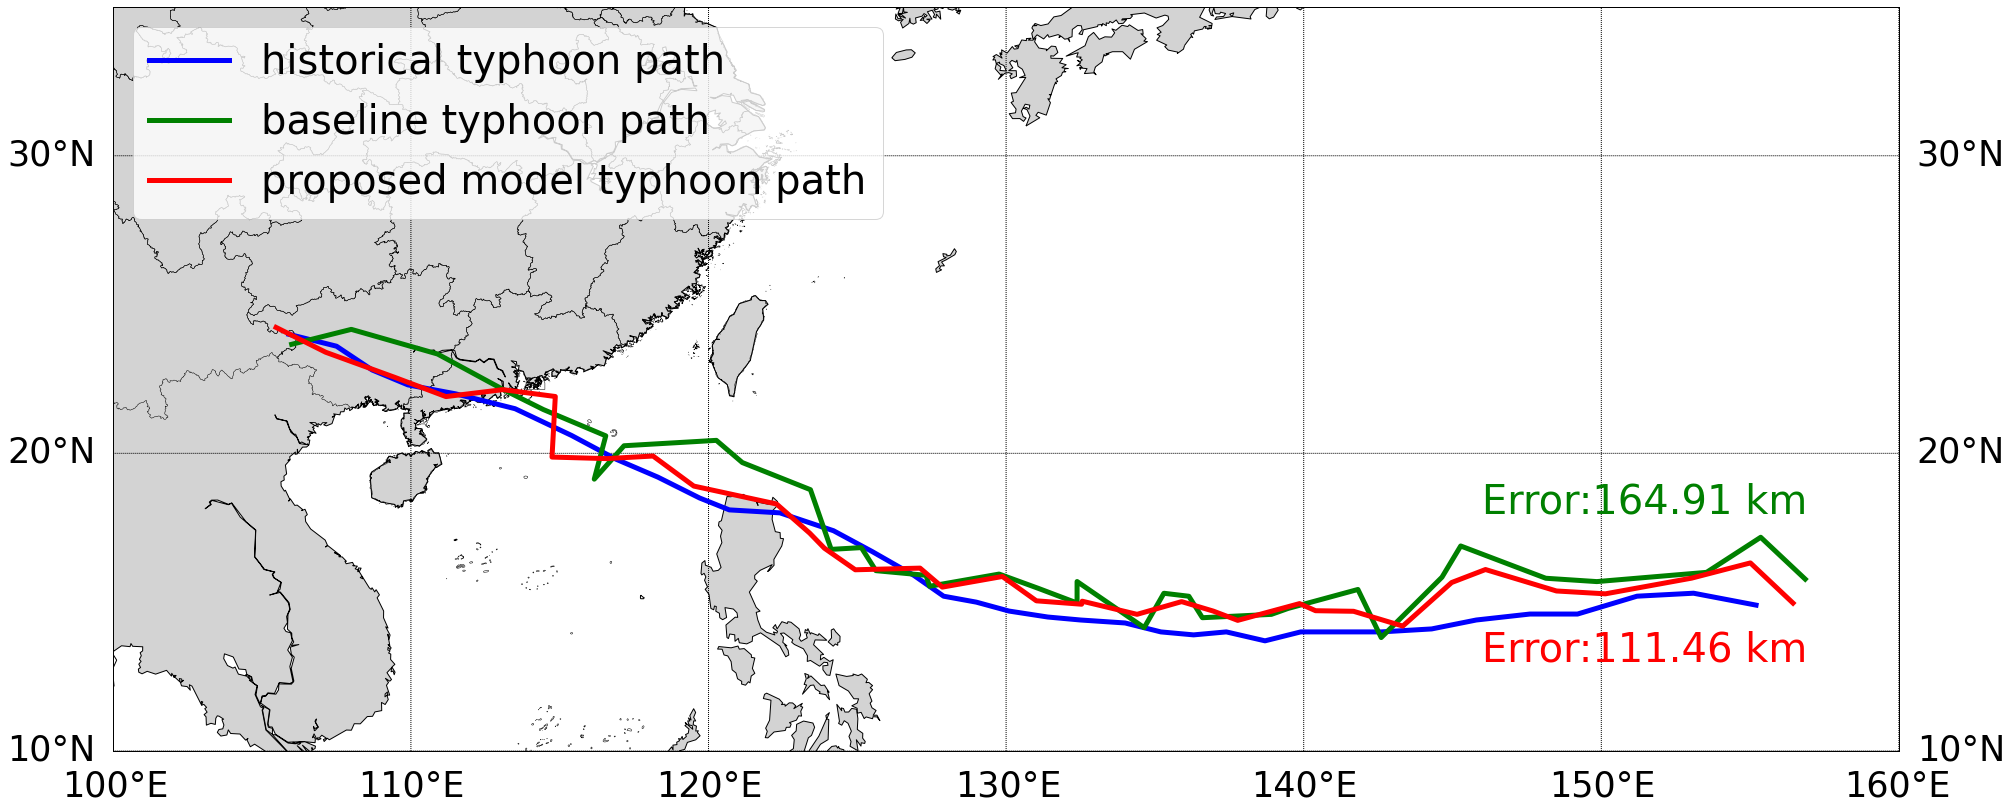

In [7]:
df_typhoon_baseline = df_baseline[df_baseline['KEY']=='2018-25'] # 山竹
df_typhoon_model = df_model[df_model['KEY']=='2018-25'] # 山竹

fig = plt.figure(figsize=(32,40))
map = Basemap(resolution='l',
              llcrnrlon=100, 
              llcrnrlat=10, 
              urcrnrlon=160, 
              urcrnrlat=35)

# draw
map.drawcoastlines()

CHN = "../shapefiles_china/china"# address of shape file
map.readshapefile(CHN,'states',drawbounds=True)

map.drawmapboundary(fill_color='white')
map.fillcontinents(color='#D3D3D3')
map.drawparallels(np.arange(0,90,10),labels=[1,1,0,1],fontsize=35)
map.drawmeridians(np.arange(0,360,10),labels=[1,1,0,1],fontsize=35)

color = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan']
# a basic map of guangdong 

map.plot(df_typhoon_baseline['LONG'], df_typhoon_baseline['LAT'], color='blue', linewidth=5, label='historical typhoon path')
map.plot(df_typhoon_baseline['PRED_LONG'], df_typhoon_baseline['PRED_LAT'], color='green',linewidth=5, label='baseline typhoon path')
map.plot(df_typhoon_model['PRED_LONG'], df_typhoon_model['PRED_LAT'], color='red',linewidth=5, label='proposed model typhoon path')
plt.legend(loc='upper left', prop={'size':40})
plt.annotate('Error:164.91 km', xy=(146, 18),fontsize='40', color='green')
plt.annotate('Error:111.46 km', xy=(146, 13),fontsize='40', color='red')
plt.savefig('2018.pdf')
plt.show()

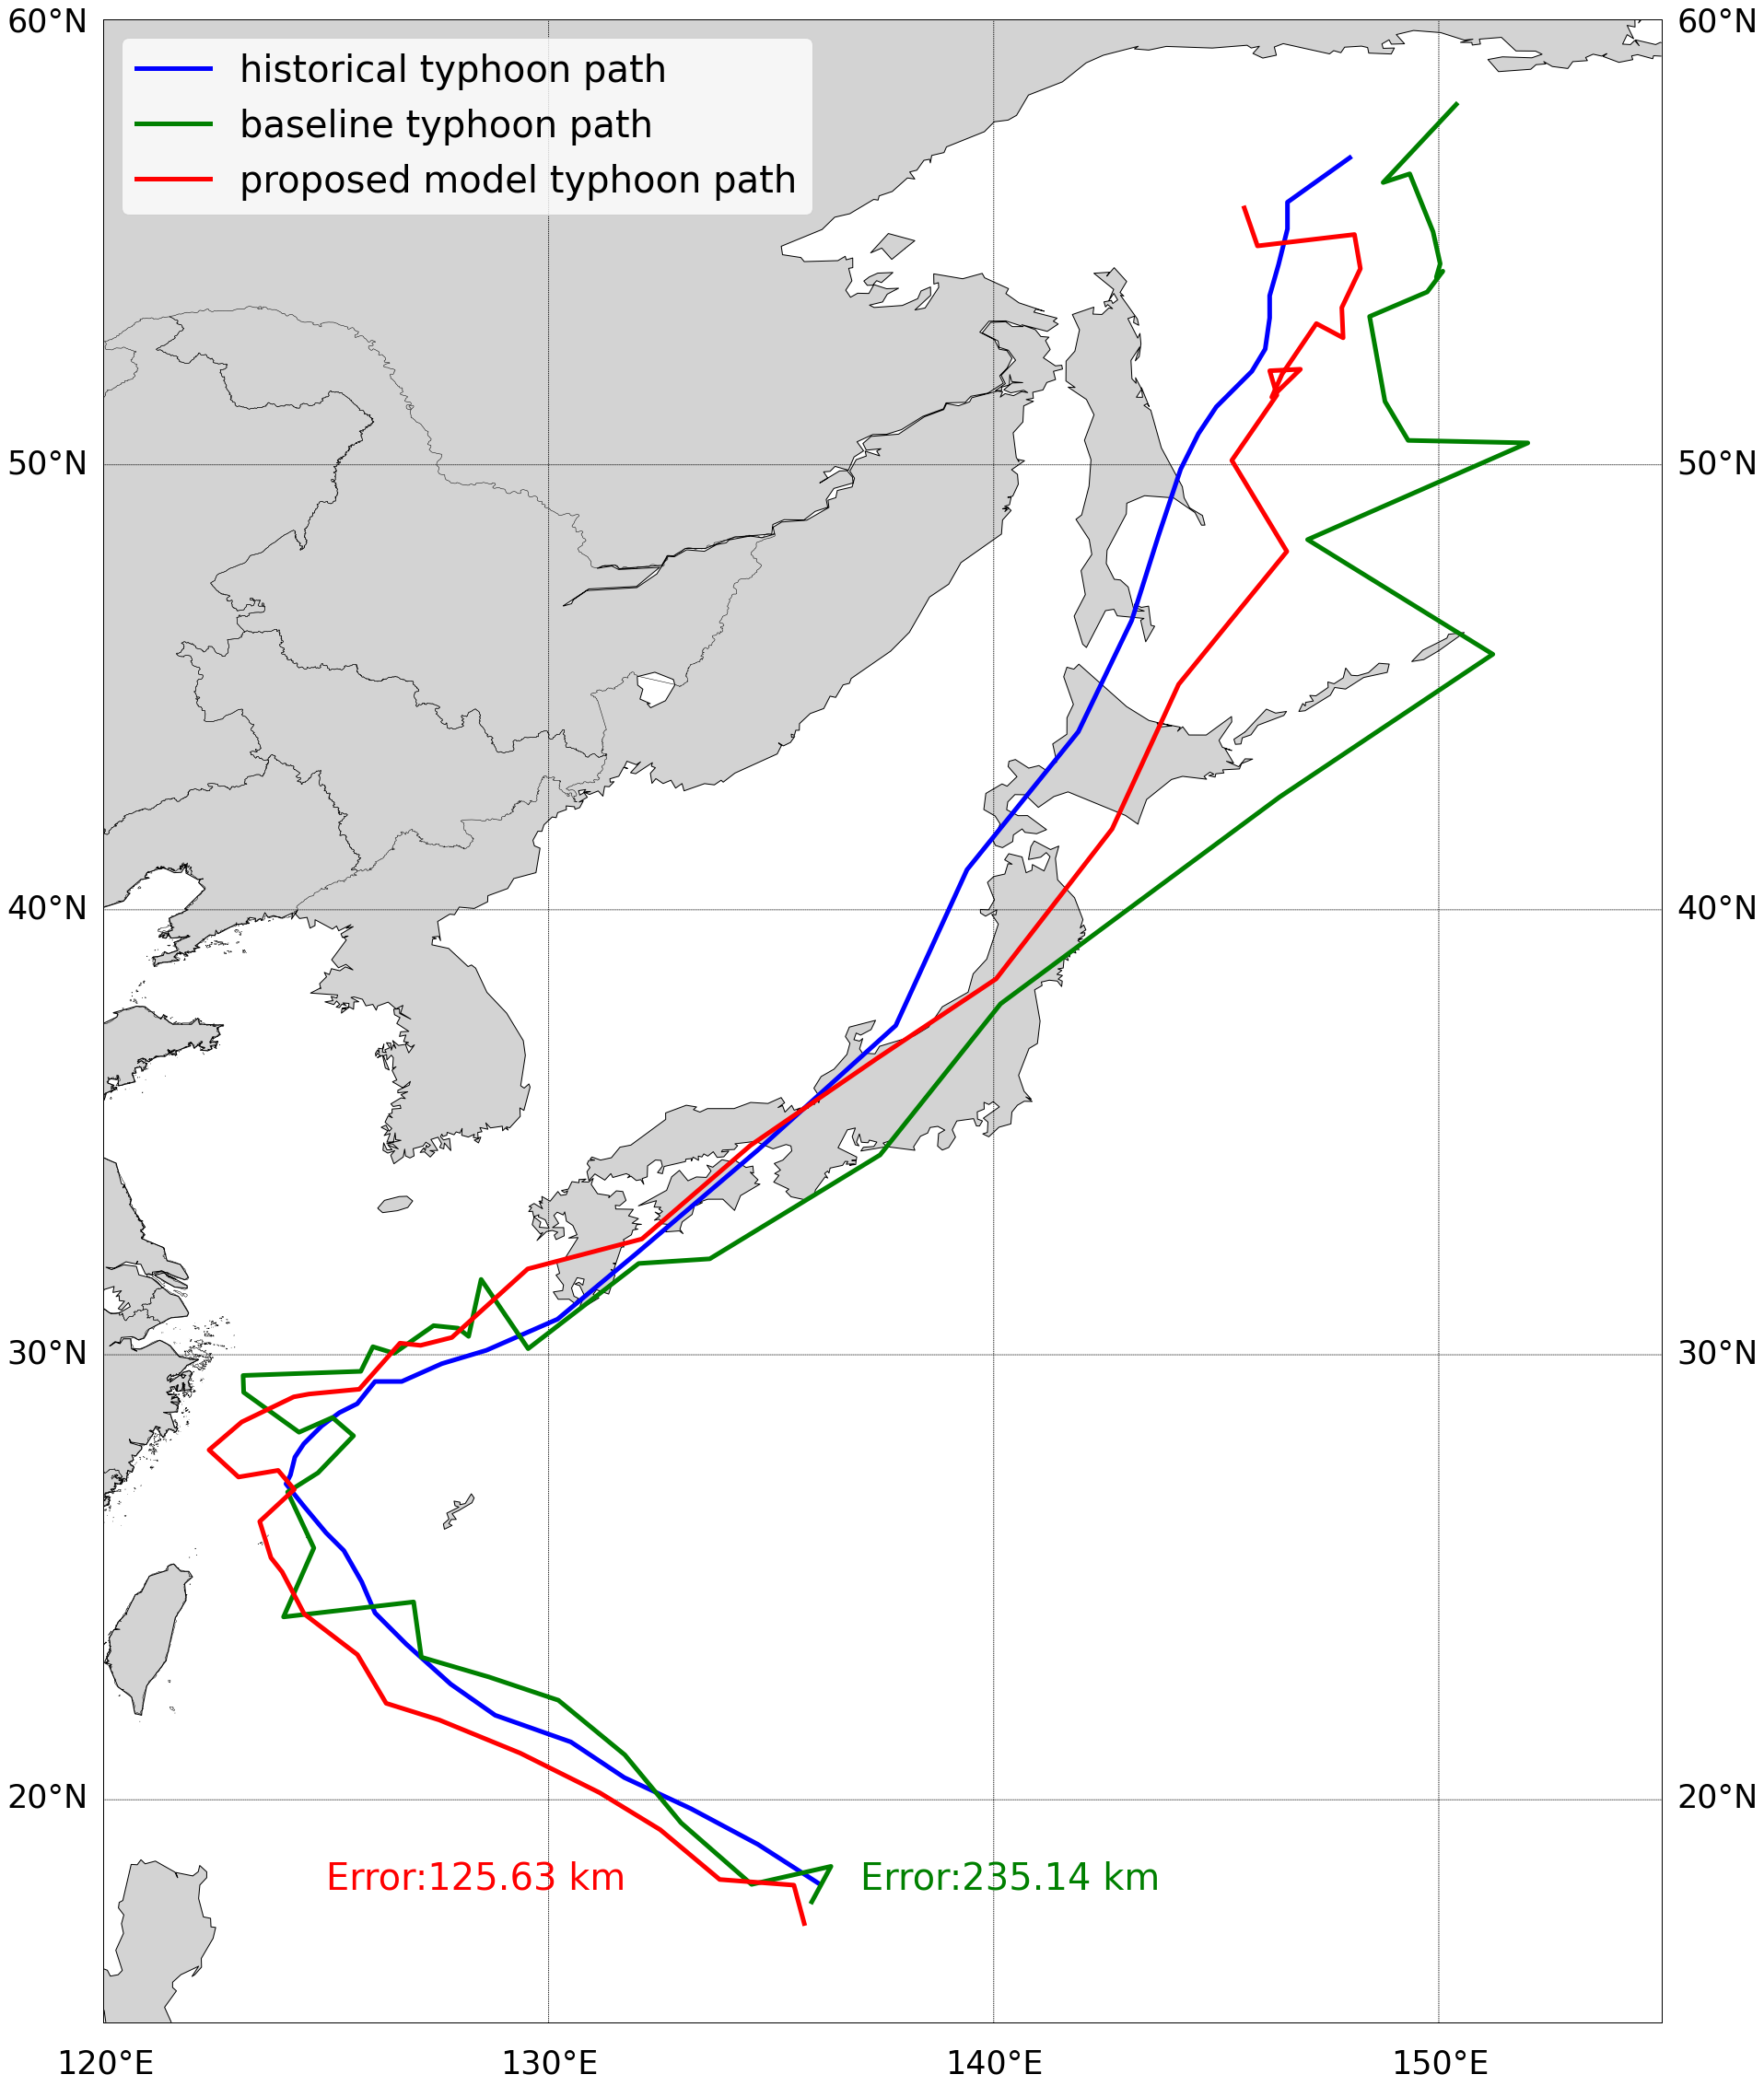

In [8]:
df_typhoon_baseline = df_baseline[df_baseline['KEY']=='2017-19'] # 泰利
df_typhoon_model = df_model[df_model['KEY']=='2017-19'] # 山竹

fig = plt.figure(figsize=(32,40))
map = Basemap(resolution='l',
              llcrnrlon=120, 
              llcrnrlat=15, 
              urcrnrlon=155, 
              urcrnrlat=60)

# draw
map.drawcoastlines()

CHN = "/home/ices/work/master_graduation/my_jupyter/china-shapefiles-master/shapefiles/china" # address of shape file
map.readshapefile(CHN,'states',drawbounds=True)

map.drawmapboundary(fill_color='white')
map.fillcontinents(color='#D3D3D3')
map.drawparallels(np.arange(0,90,10),labels=[1,1,0,1],fontsize=35)
map.drawmeridians(np.arange(0,360,10),labels=[1,1,0,1],fontsize=35)

color = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan']
# a basic map of guangdong 

map.plot(df_typhoon_baseline['LONG'], df_typhoon_baseline['LAT'], color='blue', linewidth=5, label='historical typhoon path')
map.plot(df_typhoon_baseline['PRED_LONG'], df_typhoon_baseline['PRED_LAT'], color='green',linewidth=5, label='baseline typhoon path')
map.plot(df_typhoon_model['PRED_LONG'], df_typhoon_model['PRED_LAT'], color='red',linewidth=5, label='proposed model typhoon path')
plt.legend(loc='upper left', prop={'size':40})
plt.annotate('Error:235.14 km', xy=(137, 18),fontsize='40', color='green')
plt.annotate('Error:125.63 km', xy=(125, 18),fontsize='40', color='red')
plt.savefig('2017.pdf')
plt.show()